<a href="https://colab.research.google.com/github/centeno/covid-impact-scrapper/blob/master/step03_1_pnl_grey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
# Install

#!apt-get update # to update ubuntu to correctly run apt install

# get domains
# https://pypi.org/project/tld/
#!pip install tld

# geocod
#!pip install geopy

# dataviz
#!pip install --upgrade plotly
#!pip install jupyter-dash
#!pip install raceplotly

#!pip install "gensim==3.8.1"
#!pip install nltk
#!pip install texthero
#!pip install pycaret

#bert
#!pip install transformers
#!pip install bert-extractive-summarizer

#Ktrain
#!pip install numpy>=1.20.0
#!pip install tensorflow
#!pip3 install ktrain

#packages
#!python -m spacy download en_core_web_sm
#!python -m textblob.download_corpora

# spacy
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en
#!python -m spacy download pt
#!python -m spacy download en_core_web_sm

# Country converter
#! pip install country_converter --upgrade

# Contextual spell correction with spacy and bert
#!pip install contextualSpellCheck


# Sentiment analysis
#!pip install text2emotion

#Python library for interactive topic model visualization
#!pip install pyLDAvis


# IMPORT

In [ ]:
# Manipulação e visualização de dados
import os
import re
import sys
import glob
import socket
import urllib
import datetime
import numpy as np
import pandas as pd
from time import sleep


#dataviz
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 


# Com o NLTK fazemos Processamento de Linguagem Natural
import nltk
import spacy
import string

# get domain
import tld
from tld import get_tld, get_fld


# PLN
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
import string
import texthero as hero
from texthero import preprocessing
import ktrain
from ktrain import text


# Definimos o parâmetro abaixo para evitar o erro:
# RecursionError: maximum recursion depth exceeded
# Ao gravar os resultados em disco
sys.setrecursionlimit(50000)

%matplotlib inline


#https://discuss.analyticsvidhya.com/t/how-to-display-full-dataframe-in-pandas/23298/3
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)



# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Vamos desativar isso.
import sys
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# INPUT

In [ ]:
path = "/home/eluis/workspace/covid19impact/data/01_grey/2020/02_categorization/"

In [ ]:
#combine all files in the list
df = pd.read_csv(path+'step02_categorization_grey_v1.csv', sep=';', parse_dates=["date"], engine="python", encoding='UTF-8')

In [ ]:
print(df.shape);
df.head(2)

(1116, 83)


Unnamed: 0 type_study       date  year  month  \
0        1871       grey 2019-11-26  2019     11   
1        2220       grey 2020-04-12  2020      4   

                                              header  \
0                     annual report - CARE's Ratings   
1  Life in Post-Covid Sri Lanka: 2030 | by Jonath...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://medium.com/@jonathanfran/life-in-post-...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  The Coronavirus crisis has resulted in the lar...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1           medium.com  /@jonathanfran/life-in-post-covid-sri-lanka-20...   

  query  fragment        host_name      ip_address         Type  \
0   NaN       NaN  careratings.com   202.46.201.53  geolocation   
1   NaN       NaN       medium.com  104.16.123.127  geolocation   

  AdditionalData CountryCode    CountryName        State      City  \
0             {}          IN          India  Maharashtra     Powai   
1             {}          US  United States   California  San Jose   

    Longitude   Latitude       IpAddress  \
0   72.877701  19.076000   202.46.201.53   
1 -121.838226  37.330528  104.16.123.127   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  Life in Post-Covid Sri Lanka: 2030 | by Jonath...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  The Coronavirus crisis has resulted in the lar...  NaN   NaN        4    3   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          8   
1            1  Pre-COVID         17   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  Life in Post-Covid Sri Lanka: 2030 | by Jonath...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  Life in PostCovid Sri Lanka 2030  by Jonathan ...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'accounts', 'cipd', 'info...   
1  ['hpe', 'delivers', 'cloud', 'experience', 'ev...   

               text_context_true_wo_punct_clean_stem  \
0  annual report account cipd inform arrang inclu...   
1  hpe deliv cloud experi everywher next digit ma...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report account cipd informal arrangemen...          35         308   
1  hpe delivers cloud experience everywhere next ...          36         332   

   avg_word  stopwords  hastags  \
0       1.0         12        0   
1       1.0          2        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 ; annual report and accounts - cipd...    0.0    0.0       0.0   
1  2019-12-03 ; hpe delivers the cloud experience...    0.0    0.0       0.0   

    Sad  Fear dominant_emotion  weekday  questao1-persona questao2-persona  \
0  0.44  0.56             Fear  Tuesday               NaN              NaN   
1  0.60  0.40              Sad  Tuesday               NaN              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1  life postcovid sri lanka   jonathan francis  c...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1  

# GEOINT

In [ ]:
import plotly.express as px 
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", zoom = 0)
fig.update_layout(mapbox_style="open-street-map") 
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

# Exploratory data analysis (EDA)

In [ ]:
df['status1-selecao'] = df['status1-selecao'].astype(int)
df['status2-duplicated'] = df['status2-duplicated'].astype(int)
df['status3-title-abst_keys'] = df['status3-title-abst_keys'].astype(int)
df['status4-read'] = df['status4-read'].astype(int)

In [ ]:
df['status1-selecao'].value_counts()

1    1116
Name: status1-selecao, dtype: int64

In [ ]:
df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.replace('-', '', regex=True)
df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.replace(';', ' ', regex=True)

df['rq3'] = df['rq3'].str.replace(';', ' ', regex=True)

df['setor'] = df['setor'].replace(0,np.nan)
df['tipo_porte'] = df['tipo_porte'].str.replace('-', '', regex=True)
df['tipo_porte'] = df['tipo_porte'].str.replace(';', ' ', regex=True)

In [ ]:
df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.lower()

In [ ]:
df['rq2.1_fase_citada'].value_counts()

postcovid                                  84
covidshock postcovid                       23
covidshock                                 10
precovid postcovid                          9
precovid covidshock                         7
postcovid covidshock                        4
covidshock postshock postcovid              4
precovid covidshock postcovid               3
covidshock postshock                        3
precovid                                    1
covidshock postshock postcovid              1
postshock postcovid                         1
postshock                                   1
postcovid covidshock postshock              1
precovid covidshock postshock               1
precovid covidshock postshock postcovid     1
Name: rq2.1_fase_citada, dtype: int64

In [ ]:
df['tier'].value_counts()

tier-2    841
tier-3    188
tier-1     87
Name: tier, dtype: int64

In [ ]:
print(df.shape);
df.head()

(1116, 83)


Unnamed: 0 type_study       date  year  month  \
0        1871       grey 2019-11-26  2019     11   
1        2220       grey 2020-04-12  2020      4   
2        2914       grey 2019-12-14  2019     12   
3        2945       grey 2019-12-14  2019     12   
4        3216       grey 2020-04-09  2020      4   

                                              header  \
0                     annual report - CARE's Ratings   
1  Life in Post-Covid Sri Lanka: 2030 | by Jonath...   
2  4 Ways Technology Is Helping to Fight the Coro...   
3                    Sustainability Report - Infosys   
4                               Webinars — GRIP I.T.   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://medium.com/@jonathanfran/life-in-post-...            1   
2  https://www.zsah.net/technology-fight-coronavi...            1   
3  https://www.infosys.com/sustainability/documen...            1   
4                    https://www.gripit.ca/webinars/            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  The Coronavirus crisis has resulted in the lar...    https   
2  Connect organisations in need of development h...    https   
3  operational resilience of the Company. One of ...    https   
4  ... as Usual During COVID-19. Remote Working T...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1           medium.com  /@jonathanfran/life-in-post-covid-sri-lanka-20...   
2         www.zsah.net                     /technology-fight-coronavirus/   
3      www.infosys.com  /sustainability/documents/infosys-sustainabili...   
4        www.gripit.ca                                         /webinars/   

  query  fragment        host_name      ip_address         Type  \
0   NaN       NaN  careratings.com   202.46.201.53  geolocation   
1   NaN       NaN       medium.com  104.16.123.127  geolocation   
2   NaN       NaN         zsah.net     91217245111  geolocation   
3   NaN       NaN      infosys.com     23.66.181.5  geolocation   
4   NaN       NaN        gripit.ca    104.251.99.5  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          US   United States   California   
2             {}          GB  United Kingdom      England   
3             {}          US   United States     Illinois   
4             {}          CA          Canada      Ontario   

                  City   Longitude   Latitude       IpAddress  \
0                Powai   72.877701  19.076000   202.46.201.53   
1             San Jose -121.838226  37.330528  104.16.123.127   
2  City of Westminster   -0.116700  51.500000     91217245111   
3              Chicago  -87.671249  41.848850     23.66.181.5   
4        Richmond Hill  -79.401947  43.843651    104.251.99.5   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  Life in Post-Covid Sri Lanka: 2030 | by Jonath...   
2  4 Ways Technology Is Helping to Fight the Coro...   
3                    Sustainability Report - Infosys   
4                               Webinars — GRIP I.T.   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  The Coronavirus crisis has resulted in the lar...  NaN   NaN        4    3   
2  Connect organisations in need of development h...  NaN   NaN        4   14   
3  operational resilience of the Company. One of ...  NaN   NaN        4   14   
4  ... as Usual During COVID-19. Remote Working T...  NaN   NaN        4   18   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          8   
1            1  Pre

In [ ]:
print(df.shape);
df[['date','header', 'status2-duplicated']].head()

(1116, 83)


date                                             header  \
0 2019-11-26                     annual report - CARE's Ratings   
1 2020-04-12  Life in Post-Covid Sri Lanka: 2030 | by Jonath...   
2 2019-12-14  4 Ways Technology Is Helping to Fight the Coro...   
3 2019-12-14                    Sustainability Report - Infosys   
4 2020-04-09                               Webinars — GRIP I.T.   

   status2-duplicated  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [ ]:
df[df['status2-duplicated']==True].shape

(0, 83)

In [ ]:
# Identify types of columns
df.dtypes

Unnamed: 0                                         int64
type_study                                        object
date                                      datetime64[ns]
year                                               int64
month                                              int64
header                                            object
link                                              object
on_20200511                                        int64
summary                                           object
protocol                                          object
domain                                            object
path                                              object
query                                             object
fragment                                         float64
host_name                                         object
ip_address                                        object
Type                                              object
AdditionalData                 

### Get features from dates

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['quarter'] = df.date.dt.quarter
df['day'] = df.date.dt.day
df['day_of_week'] = df.date.dt.dayofweek

In [ ]:
# Order by date
df = df.sort_values(by=['date'])

In [ ]:
print(df.shape);
df[['date', 'header','year','quarter','day_of_week']].head(2)

(1116, 83)


date                                             header  year  \
0 2019-11-26                     annual report - CARE's Ratings  2019   
2 2019-12-14  4 Ways Technology Is Helping to Fight the Coro...  2019   

   quarter  day_of_week  
0        4            1  
2        4            5

## COVID Shock Wave

In [ ]:
df.loc[ (df['year']==2020) & (df['quarter']==1) ].head(2)

Unnamed: 0 type_study       date  year  month  \
5        4287       grey 2020-01-14  2020      1   
6        5290       grey 2020-02-03  2020      2   

                                              header  \
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
5  https://www.thoughtworks.com/china-covid-19-video            1   
6  https://www.atu.org/coronavirusresources/Lands...            1   

                                             summary protocol  \
5  Embrace a modern approach to software developm...    https   
6  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
5  www.thoughtworks.com                              /china-covid-19-video   
6           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name    ip_address         Type AdditionalData  \
5   NaN       NaN  thoughtworks.com  99.84.168.63  geolocation             {}   
6   NaN       NaN           atu.org   52.2.22.143  geolocation             {}   

  CountryCode    CountryName     State     City  Longitude   Latitude  \
5          US  United States  Illinois  Chicago -87.671249  41.848850   
6          US  United States  Virginia  Ashburn -77.474197  39.043701   

      IpAddress                                header_context_true  \
5  99.84.168.63  Facing COVID-19: ThoughtWorks China's Story | ...   
6   52.2.22.143  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
5  Embrace a modern approach to software developm...  NaN   NaN        1   14   
6  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
5            1  COVID-shock         23   
6            0  COVID-shock          1   

                                   text_context_true  \
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                          text_context_true_wo_punct  \
5  Facing COVID19 ThoughtWorks Chinas Story  Thou...   
6  2020 Responses to Coronavirus COVID19  Amalgam...   

              text_context_true_wo_punct_clean_token  \
5  ['talend', 'taps', 'key', 'leadership', 'talen...   
6  ['mobile', 'games', 'developer', 'lockwood', '...   

               text_context_true_wo_punct_clean_stem  \
5  talend tap key leadership talent sap concur ra...   
6  mobil game develop lockwood publish expand egg...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
5  talend tap key leadership talent sap concur ra...          47         375   
6  mobile game developer lockwood publishing expa...          28         241   

   avg_word  stopwords  hastags  \
5       1.0         13        0   
6       1.0          2        0   

                                                 key  Happy  Angry  Surprise  \
5  2020-01-14 ; talend taps key leadership talent...    0.0   0.12      0.12   
6  2020-02-03 ; mobile games developer lockwood p...    0.0   0.00      0.00   

    Sad  Fear dominant_emotion  weekday  questao1-persona questao2-persona  \
5  0.25   0.5             Fear  Tuesday               0.0              NaN   
6  1.00   0.0              Sad   Monday               NaN              NaN   

   questao1-disaster_resilience  \
5                           0.0   
6                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
5  facing covid thoughtworks chinas story thought...                1   
6    responses coronavirus covid amalgamated     ...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
5                   0                        1             1    1    0   
6                  

In [ ]:
# Checando a proporção por idade
# Criaremos colunas auxiliares para ajudar no trabalho de análise exploratória
df['shock_wave'] = np.where((df['year']==2019) & (df['quarter']==4), 'Pre-COVID',
                   np.where((df['year']==2020) & (df['quarter']==1), 'COVID-shock',
                   np.where((df['year']==2020) & (df['quarter']==2), 'COVID-shock',
                   np.where((df['year']==2020) & (df['quarter']==3), 'COVID-shock',
                   np.where((df['year']==2020) & (df['quarter']==4), 'Post-shock',
                   np.where((df['year']==2021) & (df['quarter']==1), 'COVID-shock', # Segunda onda de covid
                            'revisar'))))))

In [ ]:
df.loc[ (df['shock_wave'] == 'revisar') ].head(2)

Empty DataFrame
Columns: [Unnamed: 0, type_study, date, year, month, header, link, on_20200511, summary, protocol, domain, path, query, fragment, host_name, ip_address, Type, AdditionalData, CountryCode, CountryName, State, City, Longitude, Latitude, IpAddress, header_context_true, summary_context_true, Asn, edges, quarter, day, day_of_week, shock_wave, page_rank, text_context_true, text_context_true_wo_punct, text_context_true_wo_punct_clean_token, text_context_true_wo_punct_clean_stem, text_context_true_wo_punct_clean_lemma, word_count, char_count, avg_word, stopwords, hastags, key, Happy, Angry, Surprise, Sad, Fear, dominant_emotion, weekday, questao1-persona, questao2-persona, questao1-disaster_resilience, text_context_true_wo_punct_clean, status1-selecao, status2-duplicated, status3-title-abst_keys, status4-read, rq1, rq2, rq2.1_fase_citada, rq3, format, font_type, tier, all_tags, conotação, tipo_porte, setor, STRINGS, covid, coronavirus, covid impact, software engineers, software development, disaster informatics, productivity, work from home, remote working, disaster, resilience]
Index: []

In [ ]:
df.loc[ (df['year']==2020) & (df['quarter']==1) ].head(2)

Unnamed: 0 type_study       date  year  month  \
5        4287       grey 2020-01-14  2020      1   
6        5290       grey 2020-02-03  2020      2   

                                              header  \
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
5  https://www.thoughtworks.com/china-covid-19-video            1   
6  https://www.atu.org/coronavirusresources/Lands...            1   

                                             summary protocol  \
5  Embrace a modern approach to software developm...    https   
6  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
5  www.thoughtworks.com                              /china-covid-19-video   
6           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name    ip_address         Type AdditionalData  \
5   NaN       NaN  thoughtworks.com  99.84.168.63  geolocation             {}   
6   NaN       NaN           atu.org   52.2.22.143  geolocation             {}   

  CountryCode    CountryName     State     City  Longitude   Latitude  \
5          US  United States  Illinois  Chicago -87.671249  41.848850   
6          US  United States  Virginia  Ashburn -77.474197  39.043701   

      IpAddress                                header_context_true  \
5  99.84.168.63  Facing COVID-19: ThoughtWorks China's Story | ...   
6   52.2.22.143  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
5  Embrace a modern approach to software developm...  NaN   NaN        1   14   
6  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
5            1  COVID-shock         23   
6            0  COVID-shock          1   

                                   text_context_true  \
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                          text_context_true_wo_punct  \
5  Facing COVID19 ThoughtWorks Chinas Story  Thou...   
6  2020 Responses to Coronavirus COVID19  Amalgam...   

              text_context_true_wo_punct_clean_token  \
5  ['talend', 'taps', 'key', 'leadership', 'talen...   
6  ['mobile', 'games', 'developer', 'lockwood', '...   

               text_context_true_wo_punct_clean_stem  \
5  talend tap key leadership talent sap concur ra...   
6  mobil game develop lockwood publish expand egg...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
5  talend tap key leadership talent sap concur ra...          47         375   
6  mobile game developer lockwood publishing expa...          28         241   

   avg_word  stopwords  hastags  \
5       1.0         13        0   
6       1.0          2        0   

                                                 key  Happy  Angry  Surprise  \
5  2020-01-14 ; talend taps key leadership talent...    0.0   0.12      0.12   
6  2020-02-03 ; mobile games developer lockwood p...    0.0   0.00      0.00   

    Sad  Fear dominant_emotion  weekday  questao1-persona questao2-persona  \
5  0.25   0.5             Fear  Tuesday               0.0              NaN   
6  1.00   0.0              Sad   Monday               NaN              NaN   

   questao1-disaster_resilience  \
5                           0.0   
6                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
5  facing covid thoughtworks chinas story thought...                1   
6    responses coronavirus covid amalgamated     ...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
5                   0                        1             1    1    0   
6                  

## Get valid host name

In [ ]:
def fetch_hostname(df): 
  urls = df['link']
  hostnames = []
  for url in urls:
    try:
      res = get_tld(url, as_object=True)
      hostnames.append(res.fld)
    except:
      res = np.nan
      hostnames.append(res)
  df['host_name'] = hostnames
  return df

In [ ]:
df = fetch_hostname(df)

In [ ]:
print(df.shape);
df.head()

(1116, 83)


Unnamed: 0 type_study       date  year  month  \
0        1871       grey 2019-11-26  2019     11   
2        2914       grey 2019-12-14  2019     12   
3        2945       grey 2019-12-14  2019     12   
5        4287       grey 2020-01-14  2020      1   
6        5290       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
2  4 Ways Technology Is Helping to Fight the Coro...   
3                    Sustainability Report - Infosys   
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
2  https://www.zsah.net/technology-fight-coronavi...            1   
3  https://www.infosys.com/sustainability/documen...            1   
5  https://www.thoughtworks.com/china-covid-19-video            1   
6  https://www.atu.org/coronavirusresources/Lands...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
2  Connect organisations in need of development h...    https   
3  operational resilience of the Company. One of ...    https   
5  Embrace a modern approach to software developm...    https   
6  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
2          www.zsah.net                     /technology-fight-coronavirus/   
3       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
5  www.thoughtworks.com                              /china-covid-19-video   
6           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
2   NaN       NaN          zsah.net    91217245111  geolocation   
3   NaN       NaN       infosys.com    23.66.181.5  geolocation   
5   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
6   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
2             {}          GB  United Kingdom      England   
3             {}          US   United States     Illinois   
5             {}          US   United States     Illinois   
6             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
2  City of Westminster  -0.116700  51.500000    91217245111   
3              Chicago -87.671249  41.848850    23.66.181.5   
5              Chicago -87.671249  41.848850   99.84.168.63   
6              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
2  4 Ways Technology Is Helping to Fight the Coro...   
3                    Sustainability Report - Infosys   
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
2  Connect organisations in need of development h...  NaN   NaN        4   14   
3  operational resilience of the Company. One of ...  NaN   NaN        4   14   
5  Embrace a modern approach to software developm...  NaN   NaN        1   14   
6  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
0            1    Pre-COVID          8   
2            5    Pre

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1115
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              1116 non-null   int64         
 1   type_study                              1116 non-null   object        
 2   date                                    1116 non-null   datetime64[ns]
 3   year                                    1116 non-null   int64         
 4   month                                   1116 non-null   int64         
 5   header                                  1116 non-null   object        
 6   link                                    1115 non-null   object        
 7   on_20200511                             1116 non-null   int64         
 8   summary                                 1116 non-null   object        
 9   protocol                                1116 non-nul

## Create page rank

In [ ]:
df['zero'] = 0
df['page_rank'] = df.groupby(['date','zero']).cumcount() + 1
df.drop(['zero'], axis=1, inplace=True)

## Tarefa 1: Qual é a distribuição de frequência por fonte - Top30?

In [ ]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("host_name").count()["header"].sort_values(ascending = False)

In [ ]:
# Visualiza os dados
grupo1.head(30)

host_name
computerweekly.com       104
uktechnews.co.uk          33
itbrief.com.au            29
remoteworkertech.asia     26
cio.com                   24
medium.com                21
computerworld.com         20
itbrief.co.nz             18
forbes.com                16
infoq.com                 15
mckinsey.com              14
itweb.co.za               13
tcs.com                   11
wsj.com                   11
idginsiderpro.com          9
ciol.com                   9
techtarget.com             9
csoonline.com              9
bankinfosecurity.com       8
crn.com                    8
thoughtworks.com           8
quora.com                  7
cioacademyasia.org         7
e2etechnologies.co.uk      7
hawaii.gov                 6
channelnomics.com          6
itwire.com                 6
ey.com                     6
experfy.com                6
yahoo.com                  6
Name: header, dtype: int64

<AxesSubplot:ylabel='host_name'>

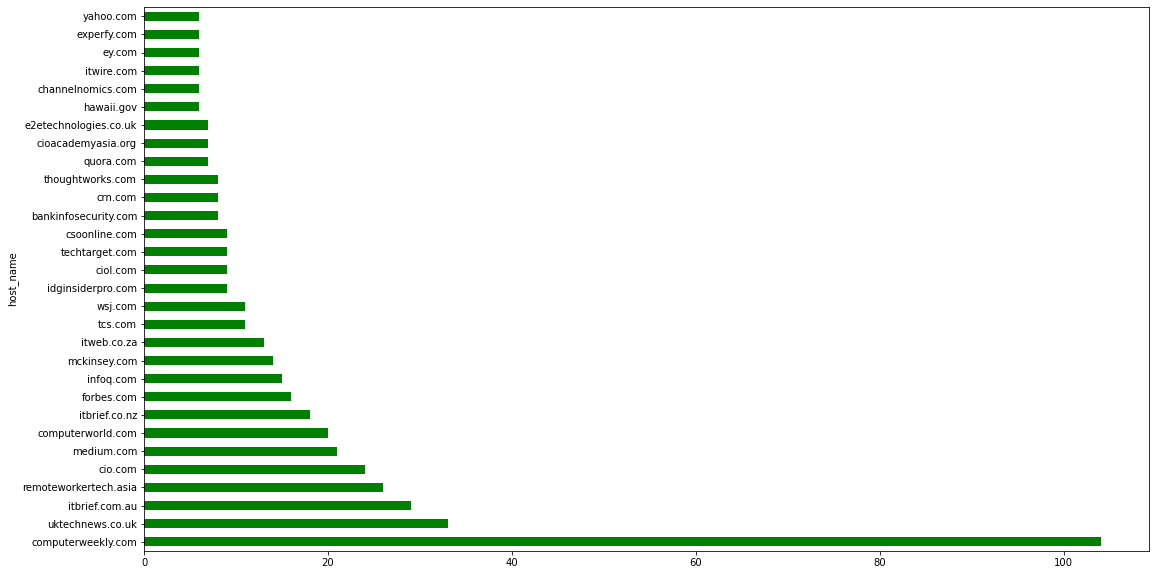

In [ ]:
# Gráfico top30 fontes

grupo1.head(30).plot(kind = "barh", figsize = (18,10), color = "green", rot = 0)

In [ ]:
# select rows containing 'thoughtworks.com'
df.loc[df['host_name'] == 'computerweekly.com'].head(3)

Unnamed: 0 type_study       date  year  month  \
32        7065       grey 2020-03-10  2020      3   
35        7119       grey 2020-03-11  2020      3   
61        7360       grey 2020-03-16  2020      3   

                                               header  \
32  Security Think Tank: ID-driven security helps ...   
35  Security Think Tank: Coronavirus crisis helps ...   
61  Covid-19: Three technology areas that CIOs mus...   

                                                 link  on_20200511  \
32  https://www.computerweekly.com/opinion/Securit...            1   
35  https://www.computerweekly.com/opinion/Securit...            1   
61  https://www.computerweekly.com/news/252480132/...            1   

                                              summary protocol  \
32  Mar 11, 2020 — Coronavirus: How to implement s...    https   
35  Mar 12, 2020 — Risk mitigation can be anything...    https   
61  Mar 17, 2020 — ... to ensure that everyone who...    https   

                    domain                                               path  \
32  www.computerweekly.com  /opinion/Security-Think-Tank-ID-driven-securit...   
35  www.computerweekly.com  /opinion/Security-Think-Tank-Coronavirus-crisi...   
61  www.computerweekly.com  /news/252480132/Covid-19-Three-technology-area...   

   query  fragment           host_name     ip_address         Type  \
32   NaN       NaN  computerweekly.com  206.19.49.153  geolocation   
35   NaN       NaN  computerweekly.com  206.19.49.153  geolocation   
61   NaN       NaN  computerweekly.com  206.19.49.153  geolocation   

   AdditionalData CountryCode    CountryName      State     City  Longitude  \
32             {}          US  United States  Louisiana  Reddell -92.426422   
35             {}          US  United States  Louisiana  Reddell -92.426422   
61             {}          US  United States  Louisiana  Reddell -92.426422   

     Latitude      IpAddress  \
32  30.675011  206.19.49.153   
35  30.675011  206.19.49.153   
61  30.675011  206.19.49.153   

                                  header_context_true  \
32  Security Think Tank: ID-driven security helps ...   
35  Security Think Tank: Coronavirus crisis helps ...   
61  Covid-19: Three technology areas that CIOs mus...   

                                 summary_context_true  Asn edges  quarter  \
32  Mar 11, 2020 — Coronavirus: How to implement s...  NaN   NaN        1   
35  Mar 12, 2020 — Risk mitigation can be anything...  NaN   NaN        1   
61  Mar 17, 2020 — ... to ensure that everyone who...  NaN   NaN        1   

    day  day_of_week   shock_wave  page_rank  \
32   10            1  COVID-shock          2   
35   11            2  COVID-shock          3   
61   16            0  COVID-shock          4   

                                    text_context_true  \
32  Security Think Tank: ID-driven security helps ...   
35  Security Think Tank: Coronavirus crisis helps ...   
61  Covid-19: Three technology areas that CIOs mus...   

                           text_context_true_wo_punct  \
32  Security Think Tank IDdriven security helps sa...   
35  Security Think Tank Coronavirus crisis helps p...   
61  Covid19 Three technology areas that CIOs must ...   

               text_context_true_wo_punct_clean_token  \
32  ['annual', 'report', 'fdm', 'group', 'software...   
35  ['asecondmouse', 'reflections', 'social', 'sci...   
61  ['coronavirus', 'companies', 'ready', 'new', '...   

                text_context_true_wo_punct_clean_stem  \
32  annual report fdm group softwar develop life c...   
35  asecondmous reflect social scienc polit surpri...   
61  coronavirus compani readi new realiti anoth go...   

               text_context_true_wo_punct_clean_lemma  word_count  char_count  \
32  annual report fdm group software development l...          31         252   
35  asecondmouse reflection social science politic...          30         278   
61  coronavirus company ready new reality another ...          23         

## Tarefa 2: Qual é a distribuição de frequência por período total

### Recorde de registros

In [ ]:
print('Recorde em 24h: ', df.page_rank.max())
print('Índice e data: ', df[df['page_rank'] == df.page_rank.max()]['date'])

Recorde em 24h:  16
Índice e data:  133   2020-03-24
158   2020-03-26
Name: date, dtype: datetime64[ns]


### Número de novos registros nos últimos 7 dias

In [ ]:
# Menos o dia corrente que só será divulgado próximo às 20h
(df['page_rank'].tail(8).sum()) - df['page_rank'].iloc[-1]

9

### Taxa de novos casos nos últimos 7 dias

In [ ]:
summary_page_rank = df.groupby(['date']).agg(
    counts = pd.NamedAgg(column='page_rank', aggfunc='max'),
        
).reset_index()

In [ ]:
summary_page_rank.columns = ['date','page_rank']
summary_page_rank.tail(7)

date  page_rank
237 2020-12-17          2
238 2020-12-20          2
239 2020-12-21          1
240 2020-12-22          1
241 2020-12-27          1
242 2020-12-28          1
243 2020-12-31          1

In [ ]:
print('Total de registros:', summary_page_rank['page_rank'].sum())
print('Total de registros nos últimos 7 dias:', summary_page_rank['page_rank'].tail(7).sum())
print('Taxa de registros nos últimos 7 dias:', summary_page_rank['page_rank'].tail(7).sum() / summary_page_rank['page_rank'].sum())

Total de registros: 1116
Total de registros nos últimos 7 dias: 9
Taxa de registros nos últimos 7 dias: 0.008064516129032258


In [ ]:
summary_page_rank['page_rank_ma2d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(2, 1).mean())
summary_page_rank['page_rank_ma3d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(3, 1).mean())
summary_page_rank['page_rank_ma4d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(4, 1).mean())
summary_page_rank['page_rank_ma5d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(5, 1).mean())
summary_page_rank['page_rank_ma7d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(7, 1).mean())
summary_page_rank['page_rank_ma14d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(14, 1).mean())

In [ ]:
summary_page_rank.head(14)

date  page_rank  page_rank_ma2d  page_rank_ma3d  page_rank_ma4d  \
0  2019-11-26          1             1.0        1.000000        1.000000   
1  2019-12-14          2             1.5        1.500000        1.500000   
2  2020-01-14          1             1.5        1.333333        1.333333   
3  2020-02-03          1             1.0        1.333333        1.250000   
4  2020-02-09          2             1.5        1.333333        1.500000   
5  2020-02-11          1             1.5        1.333333        1.250000   
6  2020-02-19          1             1.0        1.333333        1.250000   
7  2020-02-27          2             1.5        1.333333        1.500000   
8  2020-02-29          1             1.5        1.333333        1.250000   
9  2020-03-01          3             2.0        2.000000        1.750000   
10 2020-03-02          1             2.0        1.666667        1.750000   
11 2020-03-04          1             1.0        1.666667        1.500000   
12 2020-03-05          4             2.5        2.000000        2.250000   
13 2020-03-07          1             2.5        2.000000        1.750000   

    page_rank_ma5d  page_rank_ma7d  page_rank_ma14d  
0         1.000000        1.000000         1.000000  
1         1.500000        1.500000         1.500000  
2         1.333333        1.333333         1.333333  
3         1.250000        1.250000         1.250000  
4         1.400000        1.400000         1.400000  
5         1.400000        1.333333         1.333333  
6         1.200000        1.285714         1.285714  
7         1.400000        1.428571         1.375000  
8         1.400000        1.285714         1.333333  
9         1.600000        1.571429         1.500000  
10        1.600000        1.571429         1.454545  
11        1.600000        1.428571         1.416667  
12        2.000000        1.857143         1.615385  
13        2.000000        1.857143         1.571429

In [ ]:
summary_page_rank["date"] = pd.to_datetime(summary_page_rank["date"], dayfirst=False)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

df2 = summary_page_rank[['date', 'page_rank']]

x1 = df2.date
y1 = df2.page_rank

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x1,
                         y=y1,
                         mode='lines',
                         name='page rank'))

# Edit the layout
fig2.update_layout(title='Covid impact: Grey literature',
                   xaxis_title='Mês',
                   yaxis_title='Registros')

fig2.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

df2 = summary_page_rank[['date',
               'page_rank_ma2d',
               'page_rank_ma3d',
               'page_rank_ma4d',
               'page_rank_ma5d',
               'page_rank_ma7d',
               'page_rank_ma14d']]
x1 = df2.date
y1 = df2.page_rank_ma2d
y2 = df2.page_rank_ma3d
y3 = df2.page_rank_ma4d
y4 = df2.page_rank_ma5d
y5 = df2.page_rank_ma7d
y6 = df2.page_rank_ma14d

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x1,
                         y=y1,
                         mode='lines',
                         name='2dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y2,
                         mode='lines',
                         name='3dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y3,
                         mode='lines',
                         name='4dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y4,
                         mode='lines',
                         name='5dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y5,
                         mode='lines',
                         name='7dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y6,
                         mode='lines',
                         name='14dias'))

# Edit the layout
fig2.update_layout(title='Covid impact: Grey literature - média móvel',
                   xaxis_title='Mês',
                   yaxis_title='Registros')

fig2.show()

In [ ]:
sumary_host_name = df.groupby(['date','host_name']).agg(
    counts = pd.NamedAgg(column='host_name', aggfunc='count'),
        
).reset_index()

In [ ]:
sumary_host_name.sort_values(by=['counts'], ascending = False).head(20)

date              host_name  counts
446 2020-05-10     computerweekly.com       2
47  2020-03-15         intersys.co.uk       2
438 2020-05-07  remoteworkertech.asia       2
580 2020-05-31           mckinsey.com       2
919 2020-09-01             forbes.com       2
989 2020-09-24     computerweekly.com       2
653 2020-06-14                tcs.com       2
450 2020-05-10  remoteworkertech.asia       2
861 2020-08-05     computerweekly.com       2
712 2020-06-22         itbrief.com.au       2
52  2020-03-16     computerweekly.com       2
730 2020-06-25         itbrief.com.au       2
766 2020-07-05         itbrief.com.au       2
898 2020-08-26             forbes.com       2
893 2020-08-25     covidconnectni.com       2
79  2020-03-18      computerworld.com       2
578 2020-05-31     computerweekly.com       2
78  2020-03-18     computerweekly.com       2
397 2020-05-03     computerweekly.com       2
938 2020-09-06       uktechnews.co.uk       2


## Tarefa 3: Qual é a distribuição de frequência por trimestre?

In [ ]:
date_sumary = df.groupby(['date']).agg(
    counts = pd.NamedAgg(column='date', aggfunc='count'),
        
).reset_index()

In [ ]:
date_sumary.head(3)

date  counts
0 2019-11-26       1
1 2019-12-14       2
2 2020-01-14       1

In [ ]:
quarter_sumary = date_sumary.set_index('date')
quarter_sumary.index = quarter_sumary.index.to_period("Q")

In [ ]:
quarter_sumary.head()

counts
date          
2019Q4       1
2019Q4       2
2020Q1       1
2020Q1       1
2020Q1       2

<AxesSubplot:xlabel='date'>

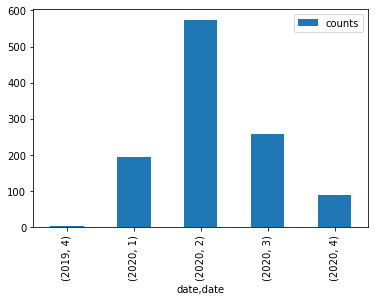

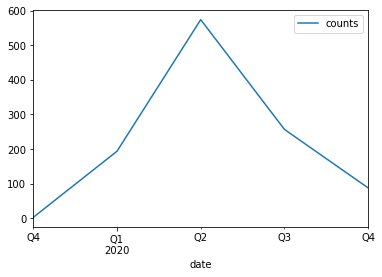

In [ ]:
quarter_sumary.groupby(by=[quarter_sumary.index.year, quarter_sumary.index.quarter]).sum().plot(kind='bar')
quarter_sumary.groupby(by=[quarter_sumary.index.year, quarter_sumary.index.quarter]).transform('sum').plot()

# PNL

It runs the following seven functions by default when using clean()

1. fillna(s) Replace not assigned values with empty spaces.
2. lowercase(s) Lowercase all text.
3. remove_digits() Remove all blocks of digits.
4. remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
5. remove_diacritics() Remove all accents from strings.
6. remove_stopwords() Remove all stop words.
7. remove_whitespace() Remove all white space between words.

In [ ]:
# Merge columns (header and summary)
df["header"] = df["header"].apply(str)
df['summary'] = df['summary'].apply(str)
df['link'] = df['link'].apply(str)

### Clear 'link' column

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace]
                   #, preprocessing.stem]
#pass the custom_pipeline to the pipeline argument
df['link2'] = hero.clean(df['link'], pipeline = custom_pipeline)
df['link2'].head()

0    https www careratings com pdf annual report an...
2      https www zsah net technology fight coronavirus
3    https www infosys com sustainability documents...
5         https www thoughtworks com china covid video
6    https www atu org coronavirusresources landsca...
Name: link2, dtype: object

In [ ]:
# Merge header and summary columns

#df["text"] =  df["header"] + " " + df["summary"]
df["text_context_true"] =  df["header_context_true"] + " " + df["summary_context_true"]  + " " +  df["link2"]
df['text_context_true'] = df['text_context_true'].apply(lambda x: str(x))

In [ ]:
# Removing Punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
df["text_context_true_wo_punct"] = df["text_context_true"].apply(lambda text: remove_punctuation(text))
df[['text_context_true','text_context_true_wo_punct']].head()

text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
2  4 Ways Technology Is Helping to Fight the Coro...   
3  Sustainability Report - Infosys operational re...   
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                          text_context_true_wo_punct  
0  annual report  CAREs Ratings Nov 27 2019 — Rat...  
2  4 Ways Technology Is Helping to Fight the Coro...  
3  Sustainability Report  Infosys operational res...  
5  Facing COVID19 ThoughtWorks Chinas Story  Thou...  
6  2020 Responses to Coronavirus COVID19  Amalgam...

In [ ]:
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["text_context_true_wo_punct"].values:
    try:
    # if player_stats['guardians'] is currently a string, let's split on the phrase " and 
        for word in text.split():
            cnt[word] += 1
    except:
    # otherwise, it is already split so we can just ignore the error.
        pass
          
cnt.most_common(10)

[('to', 1447),
 ('the', 1398),
 ('and', 1313),
 ('https', 1102),
 ('2020', 1024),
 ('—', 979),
 ('of', 907),
 ('com', 840),
 ('remote', 745),
 ('working', 716)]

In [ ]:
# Obtém as stopwords em todos os idiomas
dicionario_stopwords = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
#dicionario_stopwords

In [ ]:
# Função para detectar o idioma predominante com base nas stopwords
def descobre_idioma(text):
    
    # Aplica tokenização considerando pontuação
    palavras = set(nltk.wordpunct_tokenize(text.lower()))
    
    # Conta o total de palavras tokenizadas considerando o dicionário de stopwords
    lang = max(((lang, len(palavras & stopwords)) for lang, stopwords in dicionario_stopwords.items()), key = lambda x: x[1])[0]
    
    # Verifica se o idioma é ingles
    if lang == 'engish':
        return True
    else:
        return False

In [ ]:
# Removal of Stop Words

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

df["text_context_true_wo_punct_clean"] = df["text_context_true_wo_punct"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df[['text_context_true_wo_punct', 'text_context_true_wo_punct_clean']].head()

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
2  4 Ways Technology Is Helping to Fight the Coro...   
3  Sustainability Report  Infosys operational res...   
5  Facing COVID19 ThoughtWorks Chinas Story  Thou...   
6  2020 Responses to Coronavirus COVID19  Amalgam...   

                    text_context_true_wo_punct_clean  
0  annual report CAREs Ratings Nov 27 2019 — Rati...  
2  4 Ways Technology Is Helping Fight Coronavirus...  
3  Sustainability Report Infosys operational resi...  
5  Facing COVID19 ThoughtWorks Chinas Story Thoug...  
6  2020 Responses Coronavirus COVID19 Amalgamated...

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['text_context_true_wo_punct_clean'] = hero.clean(df['text_context_true_wo_punct_clean'], pipeline = custom_pipeline)

In [ ]:
df[['text_context_true_wo_punct_clean']].head()

text_context_true_wo_punct_clean
0  annual report cares ratings nov       ratings ...
2    ways technology is helping fight coronavirus...
3  sustainability report infosys operational resi...
5  facing covid19 thoughtworks chinas story thoug...
6    responses coronavirus covid19 amalgamated fe...

In [ ]:
import texthero as hero
from texthero import stopwords
import pandas as pd
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(['*','http', 'https', "https://", 'www', 'com', 'text', '_', '-', 'io', 'pdf', 'file', 'id',
                                                'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'set', 'oct', 'nov', 'dez',
                                                'vs', 'page', 'html', 'type', 'digit', 'de', 'co', 'wp', 'item', 'org']))
#s = pd.Series('Texthero is not only for the heroes www')

df['text_context_true_wo_punct_clean'] = hero.remove_stopwords(df['text_context_true_wo_punct_clean'], custom_stopwords)
df[['text_context_true_wo_punct_clean']].head()

text_context_true_wo_punct_clean
0  annual report cares ratings        ratings sur...
2    ways technology  helping fight coronavirus z...
3  sustainability report infosys operational resi...
5  facing covid19 thoughtworks chinas story thoug...
6    responses coronavirus covid19 amalgamated   ...

In [ ]:
# Função de limpeza dos dados

def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    #desc = [word for word in desc if word not in stop_words_pt]
    #desc = [word for word in desc if word not in stop_words_en]
    return desc

In [ ]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
df["text_context_true_wo_punct_clean_token"] = df["text_context_true_wo_punct_clean"].apply(limpa_dados)
df[['text_context_true_wo_punct_clean','text_context_true_wo_punct_clean_token']]

text_context_true_wo_punct_clean  \
0     annual report cares ratings        ratings sur...   
2       ways technology  helping fight coronavirus z...   
3     sustainability report infosys operational resi...   
5     facing covid19 thoughtworks chinas story thoug...   
6       responses coronavirus covid19 amalgamated   ...   
...                                                 ...   
1111  top   remote working stories   computer weekly...   
1112  digitalisation cyber take priority singapore b...   
1113  remote working    new normal  enable quickly d...   
1114  intels sameer sharma   plan  rebuild   post de...   
1115  moment truth pmi  needed put resilience displa...   

                 text_context_true_wo_punct_clean_token  
0     [annual, report, cares, ratings, ratings, surv...  
2     [ways, technology, helping, fight, coronavirus...  
3     [sustainability, report, infosys, operational,...  
5     [facing, thoughtworks, chinas, story, thoughtw...  
6     [responses, coronavirus, amalgamated, governor...  
...                                                 ...  
1111  [top, remote, working, stories, computer, week...  
1112  [digitalisation, cyber, take, priority, singap...  
1113  [remote, working, new, normal, enable, quickly...  
1114  [intels, sameer, sharma, plan, rebuild, post, ...  
1115  [moment, truth, pmi, needed, put, resilience, ...  

[1116 rows x 2 columns]

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   , preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['text_context_true_wo_punct_clean_stem'] = hero.clean(df['text_context_true_wo_punct_clean'], pipeline = custom_pipeline)

In [ ]:
# Lemmatization

# https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d
# https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Pos tag, used Noun, Verb, Adjective and Adverb
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# Passing the function to 'text_rare' and store in 'text_lemma'
df["text_context_true_wo_punct_clean_lemma"] = df["text_context_true_wo_punct_clean"].apply(lemmatize_words)
df[['text_context_true_wo_punct_clean','text_context_true_wo_punct_clean_lemma']].head()

text_context_true_wo_punct_clean  \
0  annual report cares ratings        ratings sur...   
2    ways technology  helping fight coronavirus z...   
3  sustainability report infosys operational resi...   
5  facing covid19 thoughtworks chinas story thoug...   
6    responses coronavirus covid19 amalgamated   ...   

              text_context_true_wo_punct_clean_lemma  
0  annual report care rating rating survey covid ...  
2  way technology help fight coronavirus zsah con...  
3  sustainability report infosys operational resi...  
5  face covid19 thoughtworks chinas story thought...  
6  response coronavirus covid19 amalgamate govern...

# DATAVIZ DAS RQ'S

## RQ2.1 - FASE CITADA

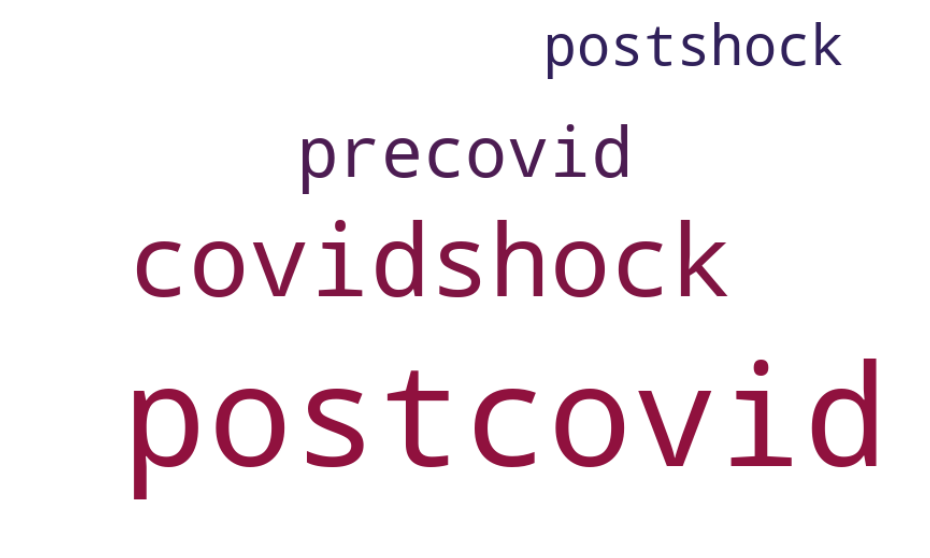

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['rq2.1_fase_citada'], width=853, height=506, max_words=5, colormap=cmap, background_color='WHITE')

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   #, preprocessing.remove_whitespace
                   #, preprocessing.remove_digits
                   #, preprocessing.remove_diacritics
                   #, preprocessing.remove_punctuation
                   #, preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['rq2.1_fase_citada_clean'] = hero.clean(df['rq2.1_fase_citada'], pipeline = custom_pipeline)

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['rq2.1_fase_citada_clean'], 20)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0   postcovid    131
1  covidshock     58
2    precovid     22
3   postshock     13

 ## RQ3 - TIPO DE IMPACTO

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['rq3_clean'] = hero.clean(df['rq3'], pipeline = custom_pipeline)

In [ ]:
# Removal of Stop Words

import nltk
nltk.download('stopwords')

stop = nltk.corpus.stopwords.words('portuguese')

df["rq3_clean"] = df["rq3"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df[['rq3_clean', 'rq3']].head()

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


rq3_clean  \
0                              transformação digital   
2  inteligência artificial cibersegurança rastrea...   
3  relatório anual financeiro trabalho remoto pro...   
5                                    trabalho remoto   
6                                     essencialidade   

                                                 rq3  
0                              transformação digital  
2  inteligência artificial cibersegurança rastrea...  
3  relatório anual financeiro trabalho remoto pro...  
5                                    trabalho remoto  
6                                     essencialidade

In [ ]:
import texthero as hero
from texthero import stopwords
import pandas as pd
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(['de']))
#s = pd.Series('Texthero is not only for the heroes www')

df['rq3_clean'] = hero.remove_stopwords(df['rq3_clean'], custom_stopwords)
df[['rq3_clean']].head()

rq3_clean
0                              transformação digital
2  inteligência artificial cibersegurança rastrea...
3  relatório anual financeiro trabalho remoto pro...
5                                    trabalho remoto
6                                     essencialidade

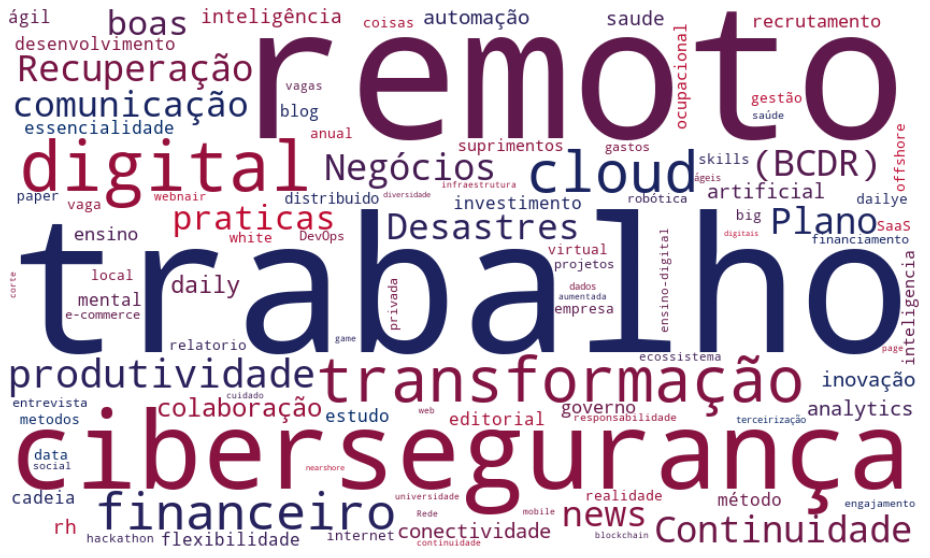

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['rq3_clean'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['rq3'], 20)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0         trabalho    664
1           remoto    650
2   cibersegurança    319
3          digital    263
4    transformação    240
5            cloud    205
6       financeiro    158
7    produtividade    154
8     continuidade    139
9         negócios    135
10       desastres    133
11           plano    132
12     recuperação    132
13            bcdr    132
14     comunicação    131
15            news    131
16            boas    127
17        praticas    123
18     colaboração    112
19           daily     96

In [ ]:
fig = go.Figure([go.Bar(x=df2['keywords'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 10 keywords in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
# get  bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['rq3_clean'], 50)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3.head()





bigram  count
0        trabalho remoto    641
1  transformação digital    240
2  continuidade negócios    134
3     plano continuidade    132
4   negócios recuperação    132

In [ ]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 bigrams in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
#get trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['rq3_clean'], 10)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4.head()




trigram  count
0        plano continuidade negócios    132
1  continuidade negócios recuperação    132
2     negócios recuperação desastres    132
3         recuperação desastres bcdr    132
4               trabalho remoto boas     74

In [ ]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 trigrams in the question text"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

## CONOTACAO

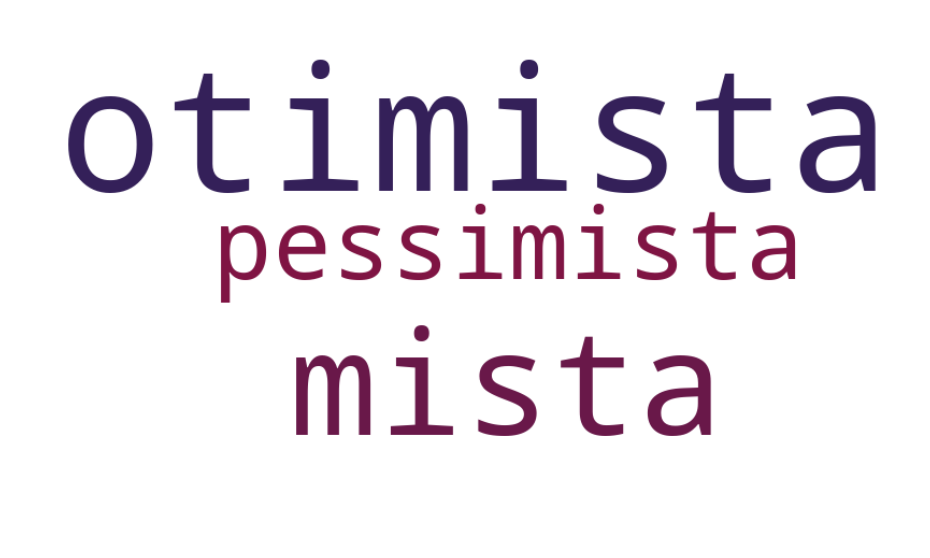

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['conotação'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['conotação'], 20)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0    otimista    580
1       mista    395
2  pessimista    141

## TIPO-PORTE

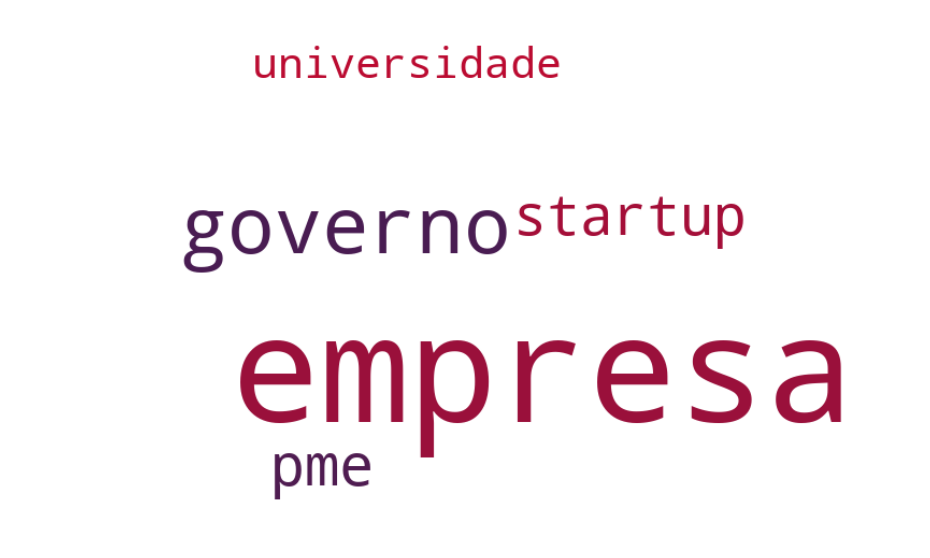

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['tipo_porte'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['tipo_porte_clean'] = hero.clean(df['tipo_porte'], pipeline = custom_pipeline)

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['tipo_porte_clean'], 20)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0       empresa   1062
1       governo     49
2           pme     23
3       startup     21
4  universidade     11

## SETOR

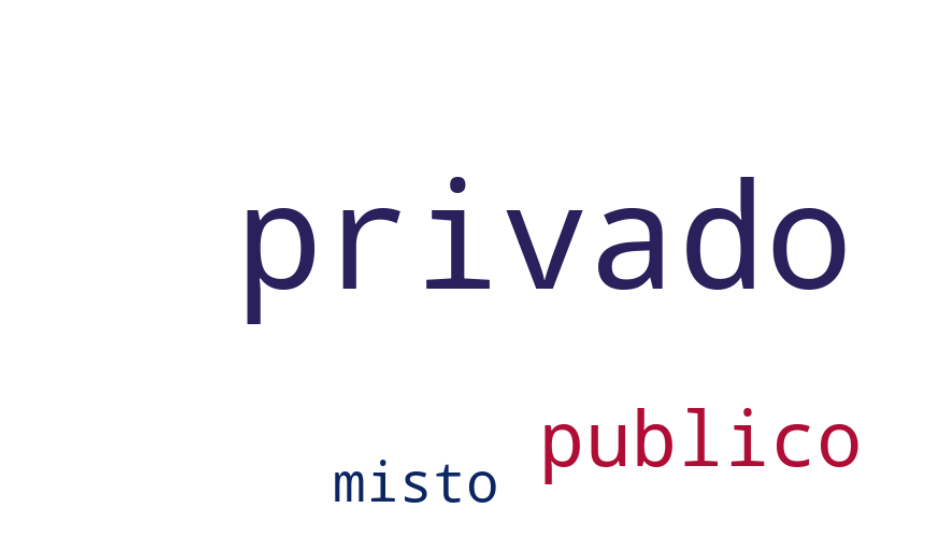

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['setor'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['tipo_porte_clean'], 20)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0       empresa   1062
1       governo     49
2           pme     23
3       startup     21
4  universidade     11

## TEXTO BASICO (TITULO + RESUMO + LINK)

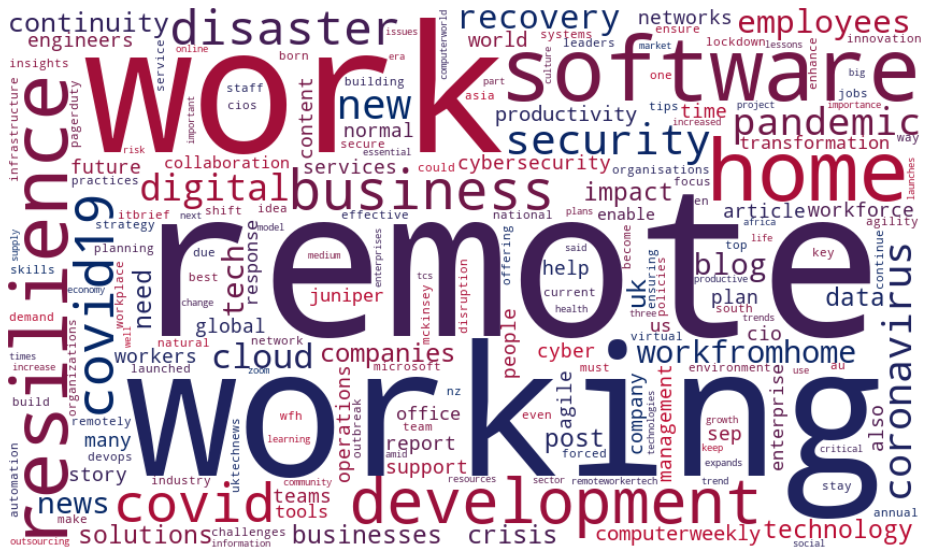

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['text_context_true_wo_punct_clean'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

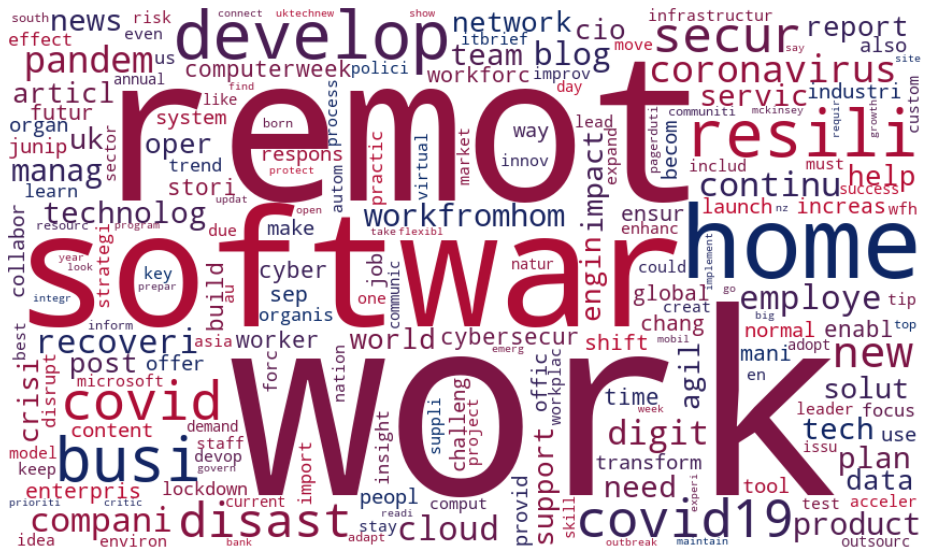

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['text_context_true_wo_punct_clean_stem'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

#### Top key words

In [ ]:
# Number of Words

df['word_count'] = df["text_context_true_wo_punct_clean_token"].apply(lambda x: len(str(x).split(" ")))
df[['text_context_true_wo_punct_clean_token','word_count']].head()

text_context_true_wo_punct_clean_token  word_count
0  [annual, report, cares, ratings, ratings, surv...          19
2  [ways, technology, helping, fight, coronavirus...          25
3  [sustainability, report, infosys, operational,...          23
5  [facing, thoughtworks, chinas, story, thoughtw...          38
6  [responses, coronavirus, amalgamated, governor...          37

In [ ]:
# Number of characters

df['char_count'] = df["text_context_true_wo_punct_clean"].map(lambda i: len(i))
df[['text_context_true_wo_punct_clean_token','char_count']].head()

text_context_true_wo_punct_clean_token  char_count
0  [annual, report, cares, ratings, ratings, surv...         182
2  [ways, technology, helping, fight, coronavirus...         221
3  [sustainability, report, infosys, operational,...         216
5  [facing, thoughtworks, chinas, story, thoughtw...         321
6  [responses, coronavirus, amalgamated, governor...         359

In [ ]:
# Average Word Length

def avg_word(sentence):
    words = [sentence.split() for sentence in sentence]
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df["text_context_true_wo_punct_clean_token"].apply(lambda x: avg_word(x))
df[['text_context_true_wo_punct_clean_token','avg_word']].head()

text_context_true_wo_punct_clean_token  avg_word
0  [annual, report, cares, ratings, ratings, surv...       1.0
2  [ways, technology, helping, fight, coronavirus...       1.0
3  [sustainability, report, infosys, operational,...       1.0
5  [facing, thoughtworks, chinas, story, thoughtw...       1.0
6  [responses, coronavirus, amalgamated, governor...       1.0

In [ ]:
# Number of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text_context_true_wo_punct'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text_context_true_wo_punct','stopwords']].head()

text_context_true_wo_punct  stopwords
0  annual report  CAREs Ratings Nov 27 2019 — Rat...          6
2  4 Ways Technology Is Helping to Fight the Coro...          6
3  Sustainability Report  Infosys operational res...         11
5  Facing COVID19 ThoughtWorks Chinas Story  Thou...         19
6  2020 Responses to Coronavirus COVID19  Amalgam...          8

In [ ]:
# Number of special characters

df['hastags'] = df['text_context_true'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text_context_true','hastags']].head()

text_context_true  hastags
0  annual report - CARE's Ratings Nov 27, 2019 — ...        0
2  4 Ways Technology Is Helping to Fight the Coro...        0
3  Sustainability Report - Infosys operational re...        0
5  Facing COVID-19: ThoughtWorks China's Story | ...        0
6  2020 Responses to Coronavirus (COVID-19) - Ama...        0

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_context_true_wo_punct_clean'], 10)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0       remote    894
1      working    787
2         work    746
3     software    692
4         home    649
5   resilience    548
6  development    546
7     business    409
8        covid    396
9      covid19    391

In [ ]:
fig = go.Figure([go.Bar(x=df2['keywords'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 10 keywords in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

### NLP Operations on Text

In [ ]:
dtst = df.head(100)
dtst.head()

Unnamed: 0 type_study       date  year  month  \
0        1871       grey 2019-11-26  2019     11   
2        2914       grey 2019-12-14  2019     12   
3        2945       grey 2019-12-14  2019     12   
5        4287       grey 2020-01-14  2020      1   
6        5290       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
2  4 Ways Technology Is Helping to Fight the Coro...   
3                    Sustainability Report - Infosys   
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
2  https://www.zsah.net/technology-fight-coronavi...            1   
3  https://www.infosys.com/sustainability/documen...            1   
5  https://www.thoughtworks.com/china-covid-19-video            1   
6  https://www.atu.org/coronavirusresources/Lands...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
2  Connect organisations in need of development h...    https   
3  operational resilience of the Company. One of ...    https   
5  Embrace a modern approach to software developm...    https   
6  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
2          www.zsah.net                     /technology-fight-coronavirus/   
3       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
5  www.thoughtworks.com                              /china-covid-19-video   
6           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
2   NaN       NaN          zsah.net    91217245111  geolocation   
3   NaN       NaN       infosys.com    23.66.181.5  geolocation   
5   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
6   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
2             {}          GB  United Kingdom      England   
3             {}          US   United States     Illinois   
5             {}          US   United States     Illinois   
6             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
2  City of Westminster  -0.116700  51.500000    91217245111   
3              Chicago -87.671249  41.848850    23.66.181.5   
5              Chicago -87.671249  41.848850   99.84.168.63   
6              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
2  4 Ways Technology Is Helping to Fight the Coro...   
3                    Sustainability Report - Infosys   
5  Facing COVID-19: ThoughtWorks China's Story | ...   
6  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
2  Connect organisations in need of development h...  NaN   NaN        4   14   
3  operational resilience of the Company. One of ...  NaN   NaN        4   14   
5  Embrace a modern approach to software developm...  NaN   NaN        1   14   
6  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
0            1    Pre-COVID          1   
2            5    Pre

In [ ]:
#nlp = spacy.load('en_core_web_lg')
nlp = spacy.load('en_core_web_sm')

tokens = nlp(''.join(str(dtst.text_context_true.tolist())))
tokens

["annual report - CARE's Ratings Nov 27, 2019 — Ratings' Survey on Covid Impact – 17-3-2020. 11. 12. 1. 2. 3. 4. 5 ... IT has successfully enabled all employees to work from home. The focus for\xa0... https www careratings com pdf annual report annual 20report 202020 web pdf", '4 Ways Technology Is Helping to Fight the Coronavirus - zsah Connect organisations in need of development help; Voluntary web and software development services offering; Tools for COVID-19 data queries; COVID-19\xa0... https www zsah net technology fight coronavirus', 'Sustainability Report - Infosys operational resilience of the Company. One of the first response actions at Infosys was the creation of a dedicated COVID-19 core response team, chaired by our\xa0... https www infosys com sustainability documents infosys sustainability report pdf', "Facing COVID-19: ThoughtWorks China's Story | ThoughtWorks Embrace a modern approach to software development and deliver value faster ... to remote delivery models, and

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(10)

[('Mar 19, 2020', 13),
 ('Mar 17, 2020', 10),
 ('COVID-19', 9),
 ('Mar 18, 2020', 9),
 ('Apple', 6),
 ('2020', 5),
 ('4', 4),
 ('5', 4),
 ('Mar 13, 2020', 4),
 ('Mar 16, 2020', 4)]

In [ ]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(10)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])
df_person

text  count
0           COVID-19      3
1           Software      3
2          Voluntary      1
3     Quora COVID-19      1
4            and\xa0      1
5         IT Managed      1
6                Mac      1
7  COVID-19 Customer      1
8              Zuora      1
9      Alex Scroxton      1

In [ ]:
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(10)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])
df_norp

text  count
0  American      1

In [ ]:
gpe_list = []
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(10)
df_gpe = pd.DataFrame(norp_counts, columns =['text', 'count'])
df_gpe 

text  count
0            UK      2
1      American      1
2            US      1
3            DR      1
4  South Africa      1
5    California      1
6        Oregon      1
7     Wellbeing      1
8          U.S.      1
9   South Korea      1

# PNL - TOPIC MODELING

## Analisar a ocorrência de palavras chaves¶

In [ ]:
#https://medium.com/better-programming/how-i-analyzed-mediums-popular-page-with-python-part-2-c1952583061e

# strings or keywords to look for
keywords = [
'covid',
'coronavirus',
'covid impact',
'software engineers',
'software development',
'disaster informatics',
'productivity',
'work from home',
'remote working',
'disaster',
'resilience']


In [ ]:
df2 = df[['date','text_context_true_wo_punct_clean']]
df2.head()

date                   text_context_true_wo_punct_clean
0 2019-11-26  annual report cares ratings        ratings sur...
2 2019-12-14    ways technology  helping fight coronavirus z...
3 2019-12-14  sustainability report infosys operational resi...
5 2020-01-14  facing covid19 thoughtworks chinas story thoug...
6 2020-02-03    responses coronavirus covid19 amalgamated   ...

In [ ]:
# search rows for keywords and show True if there is a match
for keyword in keywords:
    df2[keyword] = df2.astype(str).sum(axis=1).str.contains(keyword, case=False)

<ipython-input-104-f631cd02f56c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2['keyword_match'] = df2.astype(str).sum(axis=1).str.contains('True', case=False)
df2[['date', 'text_context_true_wo_punct_clean','keyword_match']].head(3)

<ipython-input-105-05ce4e06cdde>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date                   text_context_true_wo_punct_clean  keyword_match
0 2019-11-26  annual report cares ratings        ratings sur...           True
2 2019-12-14    ways technology  helping fight coronavirus z...           True
3 2019-12-14  sustainability report infosys operational resi...           True

In [ ]:
# add to existing keywords list for the total count column created
keywords.append('keyword_match')
# define count of keywords df and get count of each column
count_of_keywords = df2[keywords]
count_of_keywords = count_of_keywords.apply(pd.Series.value_counts)
count_of_keywords

covid  coronavirus  covid impact  software engineers  \
False    612          946          1093                1029   
True     504          170            23                  87   

       software development  disaster informatics  productivity  \
False                   621                1116.0          1034   
True                    495                   NaN            82   

       work from home  remote working  disaster  resilience  keyword_match  
False          1116.0             532       785         625             30  
True              NaN             584       331         491           1086

In [ ]:
df2.columns

Index(['date', 'text_context_true_wo_punct_clean', 'covid', 'coronavirus',
       'covid impact', 'software engineers', 'software development',
       'disaster informatics', 'productivity', 'work from home',
       'remote working', 'disaster', 'resilience', 'keyword_match'],
      dtype='object')

In [ ]:
df2[['date','covid','coronavirus','covid impact','software engineers','software development','disaster informatics','productivity',
    'work from home','remote working','disaster','resilience', 'keyword_match']].head()

date  covid  coronavirus  covid impact  software engineers  \
0 2019-11-26   True        False          True               False   
2 2019-12-14   True         True         False               False   
3 2019-12-14   True        False         False               False   
5 2020-01-14   True        False         False               False   
6 2020-02-03   True         True         False                True   

   software development  disaster informatics  productivity  work from home  \
0                 False                 False         False           False   
2                  True                 False         False           False   
3                 False                 False         False           False   
5                  True                 False         False           False   
6                 False                 False         False           False   

   remote working  disaster  resilience  keyword_match  
0           False     False       False           True  
2           False     False       False           True  
3           False     False        True           True  
5            True     False        True           True  
6            True      True       False           True

In [ ]:
df2[(df2['covid']==True) &  (df2['software development']==True)]

date                   text_context_true_wo_punct_clean  covid  \
2    2019-12-14    ways technology  helping fight coronavirus z...   True   
5    2020-01-14  facing covid19 thoughtworks chinas story thoug...   True   
9    2020-02-11   might tech world get impacted coronavirus  te...   True   
10   2020-02-19  february     cronicle press covids impact vary...   True   
12   2020-02-27  maintaining business continuity covid19 crisis...   True   
13   2020-02-29   covid19 affect technology industry quora covi...   True   
15   2020-03-01  business planning covid19 pandemic  software d...   True   
16   2020-03-01  coronavirus prep could prompt better disaster ...   True   
21   2020-03-05  agile working amidst coronavirus outbreak desc...   True   
22   2020-03-05  business continuity planning covid19 itops tim...   True   
23   2020-03-07  brave rivers support plans  covid19 pandemic  ...   True   
27   2020-03-09  community zuoras covid19 customer faq communit...   True   
42   2020-03-14  communications service providers speed dial ne...   True   
43   2020-03-14  octoverse covid19 cogi gaebalja saengsanseong ...   True   
44   2020-03-14  wifi postcovid19 era school lockdowns wfh work...   True   
52   2020-03-15  resolute update coronavirus covid19 resolute s...   True   
46   2020-03-15   developing home  new status quo due         c...   True   
62   2020-03-16  energy angels covid19 energy angels         ap...   True   
69   2020-03-17   views covid19 isolation   artificial lawyer  ...   True   
90   2020-03-18  devops cloud native enable remoteonly software...   True   
89   2020-03-18  covid19 tracker computerworld        databases...   True   
88   2020-03-18  covid19 three steps remote working effectivene...   True   
85   2020-03-18   smbs mitigate economic outcomes         deep ...   True   
82   2020-03-18   businesses adapt support remote work covid   ...   True   
97   2020-03-19  covid19 invids preparedness response plan invi...   True   
96   2020-03-19  covid19 articles webinars  cognizant thrust la...   True   
125  2020-03-23  making remotework work cybersecurity advice am...   True   
151  2020-03-25  tech leaders confront covid19 cio journal wsj ...   True   
166  2020-03-26  supporting community covid19 headspring       ...   True   
164  2020-03-26  kaspersky announces update microsoft office   ...   True   
168  2020-03-27  business operations remote working strategy bu...   True   
181  2020-03-29  panzura ceo  never covid19 pandemic        res...   True   
189  2020-03-30  extended offers business continuity micro focu...   True   
190  2020-03-30  global test automation covid19 logigear blog  ...   True   
195  2020-03-31  covid19  cios  lead way cio journal wsj       ...   True   
196  2020-03-31  covid19 cybersecurity alerts coronavirus phish...   True   
203  2020-04-01  bangladesh  digital sector tackling covid19   ...   True   
222  2020-04-05   startups  managing cost  covid19 turmoil     ...   True   
221  2020-04-05   covid19 means bangladeshs ict digital sectors...   True   
243  2020-04-07   ensure business continuity amid covid19 crisi...   True   
251  2020-04-08  covid19 impact software development  ukrainian...   True   
250  2020-04-08  coding together apart software development cov...   True   
258  2020-04-09  overcome covid19 crisis offshore software medi...   True   
266  2020-04-12  webclues infotechs business continuity plan am...   True   
1    2020-04-12  life postcovid sri lanka   jonathan francis  c...   True   
268  2020-04-13  living agile covid times090420cdr tcs resilien...   True   
273  2020-04-14   covid19   drive iot market hubspot        cov...   True   
272  2020-04-14    overview afm        group demonstrated resil...   True   
292  2020-04-16   impact covid19 coronavirus pandemic neoteric ...   True   
294  2020-04-16  covid19 leave legacy global  services        s...   True   
290  2020-04-16   agile help cope selfisolation mo        pande...   True   
305  20

In [ ]:
df['normalised_date'] = df['date'].dt.normalize()

In [ ]:
df["key"] =  df['normalised_date'].apply(str) + " ; " + df["header"] + " " + df["summary"]  + " ; " +  df["link"]

In [ ]:
df = df.reset_index().reset_index()

In [ ]:
df2 = df2.reset_index().reset_index()

In [ ]:
df.head(2)

level_0  index  Unnamed: 0 type_study       date  year  month  \
0        0      0        1871       grey 2019-11-26  2019     11   
1        1      2        2914       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://www.zsah.net/technology-fight-coronavi...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  [annual, report, cares, ratings, ratings, surv...   
1  [ways, technology, helping, fight, coronavirus...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.00    0.0       0.0   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.22    0.0       0.0   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.56             Fear   Tuesday               NaN              NaN   
1  0.22  0.56             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0  

In [ ]:
df = pd.merge(df, df2, on='level_0')

In [ ]:
df.head(2)

level_0  index_x  Unnamed: 0 type_study     date_x  year  month  \
0        0        0        1871       grey 2019-11-26  2019     11   
1        1        2        2914       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://www.zsah.net/technology-fight-coronavi...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  [annual, report, cares, ratings, ratings, surv...   
1  [ways, technology, helping, fight, coronavirus...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.00    0.0       0.0   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.22    0.0       0.0   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.56             Fear   Tuesday               NaN              NaN   
1  0.22  0.56             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                  text_context_true_wo_punct_clean_x  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2 

In [ ]:
for i in df.columns:
    print("'"+i+"'"+",")

'level_0',
'index_x',
'Unnamed: 0',
'type_study',
'date_x',
'year',
'month',
'header',
'link',
'on_20200511',
'summary',
'protocol',
'domain',
'path',
'query',
'fragment',
'host_name',
'ip_address',
'Type',
'AdditionalData',
'CountryCode',
'CountryName',
'State',
'City',
'Longitude',
'Latitude',
'IpAddress',
'header_context_true',
'summary_context_true',
'Asn',
'edges',
'quarter',
'day',
'day_of_week',
'shock_wave',
'page_rank',
'text_context_true',
'text_context_true_wo_punct',
'text_context_true_wo_punct_clean_token',
'text_context_true_wo_punct_clean_stem',
'text_context_true_wo_punct_clean_lemma',
'word_count',
'char_count',
'avg_word',
'stopwords',
'hastags',
'key',
'Happy',
'Angry',
'Surprise',
'Sad',
'Fear',
'dominant_emotion',
'weekday',
'questao1-persona',
'questao2-persona',
'questao1-disaster_resilience',
'text_context_true_wo_punct_clean_x',
'status1-selecao',
'status2-duplicated',
'status3-title-abst_keys',
'status4-read',
'rq1',
'rq2',
'rq2.1_fase_citada',
'rq3',
'format'

In [ ]:
df.columns = [
'level_0',
'index_x',
'Unnamed: 0',
'type_study',
'date_x',
'year',
'month',
'header',
'link',
'on_20200511',
'summary',
'protocol',
'domain',
'path',
'query',
'fragment',
'host_name',
'ip_address',
'Type',
'AdditionalData',
'CountryCode',
'CountryName',
'State',
'City',
'Longitude',
'Latitude',
'IpAddress',
'header_context_true',
'summary_context_true',
'Asn',
'edges',
'quarter',
'day',
'day_of_week',
'shock_wave',
'page_rank',
'text_context_true',
'text_context_true_wo_punct',
'text_context_true_wo_punct_clean_token',
'text_context_true_wo_punct_clean_stem',
'text_context_true_wo_punct_clean_lemma',
'word_count',
'char_count',
'avg_word',
'stopwords',
'hastags',
'key',
'Happy',
'Angry',
'Surprise',
'Sad',
'Fear',
'dominant_emotion',
'weekday',
'questao1-persona',
'questao2-persona',
'questao1-disaster_resilience',
'text_context_true_wo_punct_clean_x',
'status1-selecao',
'status2-duplicated',
'status3-title-abst_keys',
'status4-read',
'rq1',
'rq2',
'rq2.1_fase_citada',
'rq3',
'format',
'font_type',
'tier',
'all_tags',
'conotação',
'tipo_porte',
'setor',
'STRINGS',
'covid_x',
'coronavirus_x',
'covid impact_x',
'software engineers_x',
'software development_x',
'disaster informatics_x',
'productivity_x',
'work from home_x',
'remote working_x',
'disaster_x',
'resilience_x',
'link2',
'rq2.1_fase_citada_clean',
'rq3_clean',
'tipo_porte_clean',
'normalised_date',
'index_y',
'date_y',
'text_context_true_wo_punct_clean_y',
'covid_y',
'coronavirus_y',
'covid impact_y',
'software engineers_y',
'software development_y',
'disaster informatics_y',
'productivity_y',
'work from home_y',
'remote working_y',
'disaster_y',
'resilience_y',
'keyword_match',
]

In [ ]:
df.columns = df.columns.str.replace("_x", "")

In [ ]:
# Delete columns
df.drop([
'index_y',
'date_y',
'text_context_true_wo_punct_clean_y',
'covid_y',
'coronavirus_y',
'covid impact_y',
'software engineers_y',
'software development_y',
'disaster informatics_y',
'work from home_y',
'remote working_y',
'disaster_y',
'resilience_y',
], axis=1, inplace=True)

In [ ]:
df = df.dropna(subset=['text_context_true_wo_punct_clean'])

In [ ]:
df.shape

(1116, 92)

In [ ]:
df['text_context_true_wo_punct_clean'] = df2['text_context_true_wo_punct_clean']
df['text_context_true_wo_punct_clean'].head()

0    annual report cares ratings        ratings sur...
1      ways technology  helping fight coronavirus z...
2    sustainability report infosys operational resi...
3    facing covid19 thoughtworks chinas story thoug...
4      responses coronavirus covid19 amalgamated   ...
Name: text_context_true_wo_punct_clean, dtype: object

### Subset by covid wave

In [ ]:
df['shock_wave'].value_counts()

COVID-shock    1025
Post-shock       88
Pre-COVID         3
Name: shock_wave, dtype: int64

## Topic modeling with scikit learn

Topic Modeling Quora Questions with LDA & NMF - by: Susan Li

https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd

- git da autora

https://github.com/susanli2016/NLP-with-Python
https://github.com/susanli2016/NLP-with-Python/blob/master/Quora%20Topic%20Modeling_scikit%20learn_LDA.ipynb
https://github.com/susanli2016/NLP-with-Python/blob/master/Quora%20Topic%20Modeling_scikit%20learn_NMF.ipynb

In [ ]:

import re, nltk, spacy, gensim, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df[['text_context_true','text_context_true_wo_punct','text_context_true_wo_punct_clean']]

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



text_context_true  \
0     annual report - CARE's Ratings Nov 27, 2019 — ...   
1     4 Ways Technology Is Helping to Fight the Coro...   
2     Sustainability Report - Infosys operational re...   
3     Facing COVID-19: ThoughtWorks China's Story | ...   
4     2020 Responses to Coronavirus (COVID-19) - Ama...   
...                                                 ...   
1111  Top 10 remote working stories of 2020 - Comput...   
1112  Digitalisation and cyber take priority for Sin...   
1113  Remote working – The New Normal: How to enable...   
1114  Intel's Sameer Sharma: How We Plan To Rebuild ...   
1115  Moment of Truth| PMI We needed to put resilien...   

                             text_context_true_wo_punct  \
0     annual report  CAREs Ratings Nov 27 2019 — Rat...   
1     4 Ways Technology Is Helping to Fight the Coro...   
2     Sustainability Report  Infosys operational res...   
3     Facing COVID19 ThoughtWorks Chinas Story  Thou...   
4     2020 Responses to Coronavirus COVID19  Amalgam...   
...                                                 ...   
1111  Top 10 remote working stories of 2020  Compute...   
1112  Digitalisation and cyber take priority for Sin...   
1113  Remote working – The New Normal How to enable ...   
1114  Intels Sameer Sharma How We Plan To Rebuild In...   
1115  Moment of Truth PMI We needed to put resilienc...   

                       text_context_true_wo_punct_clean  
0     annual report cares ratings        ratings sur...  
1       ways technology  helping fight coronavirus z...  
2     sustainability report infosys operational resi...  
3     facing covid19 thoughtworks chinas story thoug...  
4       responses coronavirus covid19 amalgamated   ...  
...                                                 ...  
1111  top   remote working stories   computer weekly...  
1112  digitalisation cyber take priority singapore b...  
1113  remote working    new normal  enable quickly d...  
1114  intels sameer sharma   plan  rebuild   post de...  
1115  moment truth pmi  needed put resilience displa...  

[1116 rows x 3 columns]

In [ ]:
# get unigramns
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_context_true_wo_punct_clean'], 50)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df2.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



unigram  count
0    remote    894
1   working    787
2      work    746
3  software    692
4      home    649

In [ ]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 unigrams in the question text after removing stop words and lemmatization"))
#fig.show()


# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# get  bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['text_context_true_wo_punct_clean'], 50)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



bigram  count
0        remote working    676
1             work home    536
2  software development    520
3     disaster recovery    143
4   business continuity    121

In [ ]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 bigrams in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#get trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['text_context_true_wo_punct_clean'], 50)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4.head()


/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



trigram  count
0        employees work home     74
1        pagerduty born idea     36
2         born idea software     36
3  idea software development     36
4         work home security     35

In [ ]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 trigrams in the question text"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df['text_context_true_wo_punct_clean'])

lda_model = LatentDirichletAllocation(n_components=4, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  35.454794
2        1.782994 -295.079681       2        1  32.553840
1      220.811432 -343.832123       3        1  17.860221
3       50.533993  -76.050934       4        1  14.131146, topic_info=                  Term        Freq       Total Category  logprob  loglift
1221          security  281.000000  281.000000  Default  30.0000  30.0000
396           disaster  311.000000  311.000000  Default  29.0000  29.0000
1517           workers   91.000000   91.000000  Default  28.0000  28.0000
656               home  600.000000  600.000000  Default  27.0000  27.0000
217                cio   64.000000   64.000000  Default  26.0000  26.0000
985           pandemic  231.000000  231.000000  Default  25.0000  25.0000
1029              post  109.000000  109.000000  Default  24.0000  24.0000
475          engineers   92.000000   92.000000  Default  23.0000  23.0000
283            content   70.000000   70.000000  Default  22.0000  22.0000
1278          software  662.000000  662.000000  Default  21.0000  21.0000
335              cyber  101.000000  101.000000  Default  20.0000  20.0000
261     computerweekly  103.000000  103.000000  Default  19.0000  19.0000
1318             story   84.000000   84.000000  Default  18.0000  18.0000
1514              work  692.000000  692.000000  Default  17.0000  17.0000
168           building   47.000000   47.000000  Default  16.0000  16.0000
171           business  371.000000  371.000000  Default  15.0000  15.0000
1134            remote  840.000000  840.000000  Default  14.0000  14.0000
1115          recovery  178.000000  178.000000  Default  13.0000  13.0000
235              cloud  187.000000  187.000000  Default  12.0000  12.0000
1522           working  736.000000  736.000000  Default  11.0000  11.0000
847         management   80.000000   80.000000  Default  10.0000  10.0000
1378             teams   83.000000   83.000000  Default   9.0000   9.0000
289         continuity  126.000000  126.000000  Default   8.0000   8.0000
928           networks   73.000000   73.000000  Default   7.0000   7.0000
1379              tech  144.000000  144.000000  Default   6.0000   6.0000
221               cios   42.000000   42.000000  Default   5.0000   5.0000
931               news  145.000000  145.000000  Default   4.0000   4.0000
930                new  267.000000  267.000000  Default   3.0000   3.0000
789            leaders   38.000000   38.000000  Default   2.0000   2.0000
865           mckinsey   32.000000   32.000000  Default   1.0000   1.0000
1318             story   83.844468   84.628117   Topic1  -4.7649   1.0276
928           networks   73.068220   73.910209   Topic1  -4.9024   1.0255
847         management   79.797222   80.737837   Topic1  -4.8143   1.0252
769            juniper   59.469761   60.199565   Topic1  -5.1084   1.0247
883          microsoft   48.148745   48.914451   Topic1  -5.3195   1.0211
1378             teams   82.025759   83.352653   Topic1  -4.7868   1.0209
756            itbrief   45.507605   46.250856   Topic1  -5.3759   1.0207
666               idea   41.344034   42.112910   Topic1  -5.4719   1.0185
476            enhance   38.162079   38.930186   Topic1  -5.5520   1.0170
156               born   34.944575   35.686149   Topic1  -5.6401   1.0159
983          pagerduty   34.943776   35.686029   Topic1  -5.6401   1.0159
146                big   30.241241   30.978718   Topic1  -5.7846   1.0128
507            expands   27.634413   28.362014   Topic1  -5.8748   1.0109
686         importance   29.009974   29.788402   Topic1  -5.8262   1.0104
97                asia   38.139849   39.170217   Topic1  -5.5526   1.0103
46              africa   28.683328   29.510595   Topic1  -5.8375   1.0085
1137  remoteworkertech   24.325295   25.057995   Topic1  -6.0023   1.0072
1178              risk   29.291189   30.182798   Topic1  

In [ ]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=11):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=11)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0       Word 1    Word 2      Word 3      Word 4      Word 5  \
Topic 0    remote      working  security        work  resilience    software   
Topic 1    remote      working      work        home         new  resilience   
Topic 2  software  development  business        work       covid    disaster   
Topic 3      home         work  software  resilience      remote     working   

           Word 6       Word 7    Word 8       Word 9         Word 10  
Topic 0      home  development     cloud          new        business  
Topic 1      news         post       cio  coronavirus  computerweekly  
Topic 2  pandemic         home   covid19       remote      resilience  
Topic 3  disaster      workers  security      covid19         content

In [ ]:

Topics_theme = ['Topic1', 'Topic2', 'Topic3', 'Topic4']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0       Word 1    Word 2      Word 3      Word 4      Word 5  \
Topic 0    remote      working  security        work  resilience    software   
Topic 1    remote      working      work        home         new  resilience   
Topic 2  software  development  business        work       covid    disaster   
Topic 3      home         work  software  resilience      remote     working   

           Word 6       Word 7    Word 8       Word 9         Word 10  \
Topic 0      home  development     cloud          new        business   
Topic 1      news         post       cio  coronavirus  computerweekly   
Topic 2  pandemic         home   covid19       remote      resilience   
Topic 3  disaster      workers  security      covid19         content   

        topic_theme  
Topic 0      Topic1  
Topic 1      Topic2  
Topic 2      Topic3  
Topic 3      Topic4

In [ ]:
df_topic_keywords.set_index('topic_theme', inplace=True)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_topic_keywords.T

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme       Topic1          Topic2       Topic3      Topic4
Word 0            remote          remote     software        home
Word 1           working         working  development        work
Word 2          security            work     business    software
Word 3              work            home         work  resilience
Word 4        resilience             new        covid      remote
Word 5          software      resilience     disaster     working
Word 6              home            news     pandemic    disaster
Word 7       development            post         home     workers
Word 8             cloud             cio      covid19    security
Word 9               new     coronavirus       remote     covid19
Word 10         business  computerweekly   resilience     content

In [ ]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme  Topic1  Topic2  Topic3  Topic4  dominant_topic
Doc0           0.95    0.02    0.02    0.02               0
Doc1           0.01    0.01    0.97    0.01               2
Doc2           0.96    0.01    0.01    0.01               0
Doc3           0.98    0.01    0.01    0.01               0
Doc4           0.13    0.01    0.01    0.85               3
...             ...     ...     ...     ...             ...
Doc1111        0.01    0.97    0.01    0.01               1
Doc1112        0.54    0.01    0.44    0.01               0
Doc1113        0.63    0.01    0.34    0.01               0
Doc1114        0.01    0.61    0.38    0.01               1
Doc1115        0.25    0.48    0.24    0.02               1

[1116 rows x 5 columns]

In [ ]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df, df_document_topic, left_index=True, right_index=True)
#df_sent_topic.drop('index', axis=1, inplace=True)
df_sent_topic.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



level_0  index_x  Unnamed: 0 type_study       date  year  month  \
0        0        0        1871       grey 2019-11-26  2019     11   
1        1        2        2914       grey 2019-12-14  2019     12   
2        2        3        2945       grey 2019-12-14  2019     12   
3        3        5        4287       grey 2020-01-14  2020      1   
4        4        6        5290       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://www.zsah.net/technology-fight-coronavi...            1   
2  https://www.infosys.com/sustainability/documen...            1   
3  https://www.thoughtworks.com/china-covid-19-video            1   
4  https://www.atu.org/coronavirusresources/Lands...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3  

In [ ]:
df_topic_theme = df_sent_topic[['text_context_true_wo_punct_clean', 'dominant_topic']]
df_topic_theme.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



text_context_true_wo_punct_clean  dominant_topic
0  annual report cares ratings        ratings sur...               0
1    ways technology  helping fight coronavirus z...               2
2  sustainability report infosys operational resi...               0
3  facing covid19 thoughtworks chinas story thoug...               0
4    responses coronavirus covid19 amalgamated   ...               3

In [ ]:
def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'Topic1'
    if row['dominant_topic'] == 1 :
        return 'Topic2'
    if row['dominant_topic'] == 2 :
        return 'Topic3'
    if row['dominant_topic'] == 3:
        return 'Topic4'

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)
df_topic_theme.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-143-74cbc5cb68f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text_context_true_wo_punct_clean  dominant_topic  \
0  annual report cares ratings        ratings sur...               0   
1    ways technology  helping fight coronavirus z...               2   
2  sustainability report infosys operational resi...               0   
3  facing covid19 thoughtworks chinas story thoug...               0   
4    responses coronavirus covid19 amalgamated   ...               3   

  dominant_topic_theme  
0               Topic1  
1               Topic3  
2               Topic1  
3               Topic1  
4               Topic4

In [ ]:
df_topic_keywords.T['Topic1']

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0          remote
Word 1         working
Word 2        security
Word 3            work
Word 4      resilience
Word 5        software
Word 6            home
Word 7     development
Word 8           cloud
Word 9             new
Word 10       business
Name: Topic1, dtype: object

In [ ]:
df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



dominant_topic dominant_topic_theme  count
0               2               Topic3    418
1               0               Topic1    383
2               1               Topic2    189
3               3               Topic4    126

In [ ]:
df_topic_distribution = df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')
df_topic_distribution

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



dominant_topic dominant_topic_theme  count
0               2               Topic3    418
1               0               Topic1    383
2               1               Topic2    189
3               3               Topic4    126

### Predict the topics for a new register

In [ ]:
# Tokenize and Clean-up using gensim’s simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# We will not assign dependency labels, and we will not lable named entities. And we need pos. 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
# font: https://www.computerweekly.com/feature/Coronavirus-Managing-software-development-during-lockdown - Fev 17, 2021
mytext = ["Coronavirus: Managing software development during lockdown. The Computer Weekly Developer Network examines the impact of Covid-19 on the software application development community. With only a proportion of developers classified as key workers, the majority of programmers will have been forced to work remotely, often in solitude. Lack of face-to-face meetings can eat away at team morale and some team members may become withdrawn and more isolated."]

topic, prob_scores = predict_topic(text = mytext)
print(topic)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['software', 'development', 'business', 'work', 'covid', 'disaster', 'pandemic', 'home', 'covid19', 'remote', 'resilience']


In [ ]:
df_topic_keywords

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0       Word 1    Word 2      Word 3      Word 4  \
topic_theme                                                            
Topic1         remote      working  security        work  resilience   
Topic2         remote      working      work        home         new   
Topic3       software  development  business        work       covid   
Topic4           home         work  software  resilience      remote   

                 Word 5    Word 6       Word 7    Word 8       Word 9  \
topic_theme                                                             
Topic1         software      home  development     cloud          new   
Topic2       resilience      news         post       cio  coronavirus   
Topic3         disaster  pandemic         home   covid19       remote   
Topic4          working  disaster      workers  security      covid19   

                    Word 10  
topic_theme                  
Topic1             business  
Topic2       computerweekly  
Topic3           resilience  
Topic4              content

In [ ]:
prob_scores[0]

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([0.18874159, 0.18209002, 0.54732784, 0.08184055])

In [ ]:
topic, prob_scores

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(['software',
  'development',
  'business',
  'work',
  'covid',
  'disaster',
  'pandemic',
  'home',
  'covid19',
  'remote',
  'resilience'],
 array([[0.18874159, 0.18209002, 0.54732784, 0.08184055]]))

In [ ]:
def label_theme(row):
    if row['index_topic'] == 0 :
        return 'Topic1'
    if row['index_topic'] == 1 :
        return 'Topic2'
    if row['index_topic'] == 2 :
        return 'Topic3'
    if row['index_topic'] == 3:
        return 'Topic4'


/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Dataframe com as probabilidades previstas (em dados de teste)
df_proba = pd.DataFrame(prob_scores[0], columns = ['Probabilidade'])
df_proba = df_proba.reset_index()
df_proba.columns = ['index_topic','Probabilidade']
df_proba['dominant_topic_theme'] = df_proba.apply (lambda row: label_theme(row), axis=1)
df_proba = df_proba.sort_values(by=['Probabilidade'],ascending=False)
df_proba = df_proba.head(1)
df_proba 

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



index_topic  Probabilidade dominant_topic_theme
2            2       0.547328               Topic3

In [ ]:
topic = df_proba.dominant_topic_theme
topic

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2    Topic3
Name: dominant_topic_theme, dtype: object

In [ ]:
df_topic_keywords.T[topic]

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme       Topic3
Word 0          software
Word 1       development
Word 2          business
Word 3              work
Word 4             covid
Word 5          disaster
Word 6          pandemic
Word 7              home
Word 8           covid19
Word 9            remote
Word 10       resilience

# PNL - SENTIMENT ANALYSIS

It helps you in classifying the tone of the text by categorizing it into five different emotions as Happy, Angry, Surprise, Sad, and Fear.


text2emotion pandas case by: Puru Behl

https://www.kaggle.com/accountstatus/wall-streets-bet-data-analysis/

https://analyticsindiamag.com/social-media-monitoring-emotional-analysis-using-text2emotion-in-python/

In [ ]:
import text2emotion as te

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/eluis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/eluis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Adding the emotions to the data and Date features to the data
# Use this code if you wanna make the sentiments from scratch
%time

t=[]
#count=0
for i in df['text_context_true'].values:
    #count+=1
    #print(count*100/len(df))
    t.append(te.get_emotion(i))
t=np.array(t)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 14.3 µs


In [ ]:
#get sentiment columns
df['Happy']=[dict(i)['Happy'] for i in t]
df['Angry']=[dict(i)['Angry'] for i in t]
df['Surprise']=[dict(i)['Surprise'] for i in t]
df['Sad']=[dict(i)['Sad'] for i in t]
df['Fear']=[dict(i)['Fear'] for i in t]

#get dominant sentiment column
dominant=[]
for i in t:
    p=dict(i)
    Keymax = max(p, key=p.get)
    dominant.append(Keymax)

df['dominant_emotion']=dominant

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

df['weekday']=df['day_of_week'].apply(lambda x: day_name[x])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.head(2)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



level_0  index  Unnamed: 0 type_study       date  year  month  \
0        0      0        1871       grey 2019-11-26  2019     11   
1        1      2        2914       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://www.zsah.net/technology-fight-coronavi...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  [annual, report, cares, ratings, ratings, surv...   
1  [ways, technology, helping, fight, coronavirus...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0  

In [ ]:
df[['text_context_true_wo_punct_clean','Happy','Angry','Surprise','Sad','Fear','dominant_emotion']].head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



text_context_true_wo_punct_clean  Happy  Angry  Surprise  \
0  annual report cares ratings        ratings sur...   0.11   0.11      0.00   
1    ways technology  helping fight coronavirus z...   0.00   0.00      0.25   
2  sustainability report infosys operational resi...   0.00   0.00      0.25   
3  facing covid19 thoughtworks chinas story thoug...   0.00   0.10      0.20   
4    responses coronavirus covid19 amalgamated   ...   0.00   0.00      0.08   

    Sad  Fear dominant_emotion  
0  0.44  0.33              Sad  
1  0.25  0.50             Fear  
2  0.50  0.25              Sad  
3  0.20  0.50             Fear  
4  0.58  0.33              Sad

In [ ]:
df['dominant_emotion'].value_counts()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fear        879
Sad         147
Surprise     46
Happy        25
Angry        19
Name: dominant_emotion, dtype: int64

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



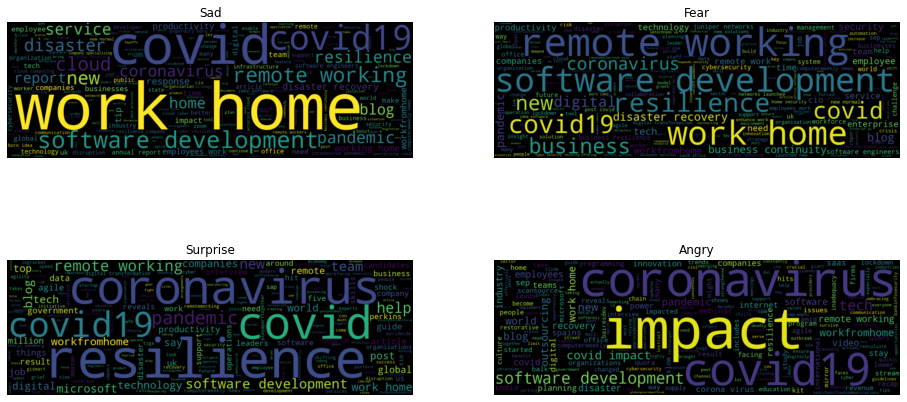

In [ ]:
# Wordplot for being angry,sad,emotional
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry']:
    dd=df[df['dominant_emotion']==i]
    text=" ".join(dd['text_context_true_wo_punct_clean'])
    wordcloud = WordCloud(width=1500, height=500).generate(text)
    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0

In [ ]:
#px.histogram(df,x='weekday',color='weekday',template='plotly_dark')
px.histogram(df,x='weekday',color='weekday')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
import matplotlib.pyplot as plt
from raceplotly.plots import barplot

df1=pd.DataFrame()
df1['Emotion']=df['dominant_emotion']
df1['Day']=df['weekday']
df1['Count']=[1]*len(df)
grouped_data=df1.groupby(['Day','Emotion']).sum()
ind=np.array(list(grouped_data.index))
df2=pd.DataFrame()
df2['Day']=ind[:,0]
df2['Emotion']=ind[:,1]
df2['Count']=grouped_data.values
my_raceplot = barplot(df2,
                      item_column='Emotion',
                      value_column='Count',
                      time_column='Day')

my_raceplot.plot(title = 'Emotion in the dataframe',
                 item_label = 'Emotions',
                 value_label = 'Count (Total Count On That Day)',
                 frame_duration = 800)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# PNL - QUESTION & ANSWERING

## Build an Open-Domain Question-Answering System With BERT and `ktrain`

We first install `ktrain` and load a dataset into a Python list. We use the [20 Newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) in this example.

fonte:

- https://towardsdatascience.com/build-an-open-domain-question-answering-system-with-bert-in-3-lines-of-code-da0131bc516b

- https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/examples/text/question_answering_with_bert.ipynb

- https://colab.research.google.com/drive/1tcsEQ7igx7lw_R0Pfpmsg9Wf3DEXyOvk

In [ ]:
df['text_context_true_wo_punct_clean'] = df['text_context_true_wo_punct_clean'].apply(str)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
docs = list(df['text_context_true_wo_punct_clean'].values.tolist())

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
docs

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['annual report cares ratings        ratings survey covid impact                    successfully enabled employees work home  focus   careratings   annual report annual 20report   web ',
 '  ways technology  helping fight coronavirus zsah connect organisations need development help voluntary web software development services offering tools covid19 data queries covid19   zsah net technology fight coronavirus',
 'sustainability report infosys operational resilience company one first response actions infosys creation dedicated covid19 core response team chaired   infosys  sustainability documents infosys sustainability report ',
 'facing covid19 thoughtworks chinas story thoughtworks embrace modern approach software development deliver value faster remote delivery models   thoughtworkers began work home plan move thoughtworks china teams remote working model helping clients recover build organizational resilience   thoughtworks  china covid video',
 '  responses coronavirus covid19 amalga

In [ ]:
type(docs)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



list

In [ ]:
import ktrain
from ktrain import text

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
INDEXDIR =  '//home/eluis/workspace/covid19impact/data/01_grey/2020/03_pnl/myindex_grey'

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### STEP 1: Create a Search Index

In [ ]:
text.SimpleQA.initialize_index(INDEXDIR)
text.SimpleQA.index_from_list(docs, INDEXDIR, commit_every=len(docs))

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### STEP 2: Create a QA instance
Next, we create a QA instance. This step will automatically download the BERT SQuAD model if it does not already exist on your system.

In [ ]:
qa = text.SimpleQA(INDEXDIR)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### STEP 3: Ask Questions
We will invoke the ask method to issue questions to the text corpus we indexed and retrieve answers. We will also use the qa.display method to nicely display the top 5 results in this Jupyter notebook. The answers are inferred using a BERT model fine-tuned on the SQuAD dataset. The model will comb through paragraphs and sentences to find candidate answers. By default, ask currently uses a batch_size of 8, but, if necessary, you can experiment with lowering it by setting the batch_size parameter. On a CPU, for instance, you may want to try batch_size=1.


##### Space Question

In [ ]:
answers = qa.ask('There are covid impact?')
qa.display_answers(answers[:2])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
answers = qa.ask('There are home work impact?')
qa.display_answers(answers[:2])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
answers = qa.ask('There are software engineers impact?')
qa.display_answers(answers[:2])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Output

In [ ]:
path2 = "/home/eluis/workspace/covid19impact/data/01_grey/2020/03_pnl/"

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.to_csv(path2 + 'step03_pnl_grey_v1.csv', sep=';', encoding='UTF-8')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

